## **Tugas Praktikum**

## Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler

In [2]:
mnist = datasets.fetch_openml("mnist_784")

c:\Users\azzam\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
# Melihat dimensi data
print("Jumlah sampel:", mnist.data.shape[0])  # Jumlah sampel/data points
print("Dimensi setiap sampel:", mnist.data.shape[1])  # Dimensi setiap sampel
print("Jumlah kelas:", len(mnist.target.unique()))

Jumlah sampel: 70000
Dimensi setiap sampel: 784
Jumlah kelas: 10


## Eksplorasi Dataset

Jumlah data setiap label:
Label 0: 6903 data
Label 1: 7877 data
Label 2: 6990 data
Label 3: 7141 data
Label 4: 6824 data
Label 5: 6313 data
Label 6: 6876 data
Label 7: 7293 data
Label 8: 6825 data
Label 9: 6958 data


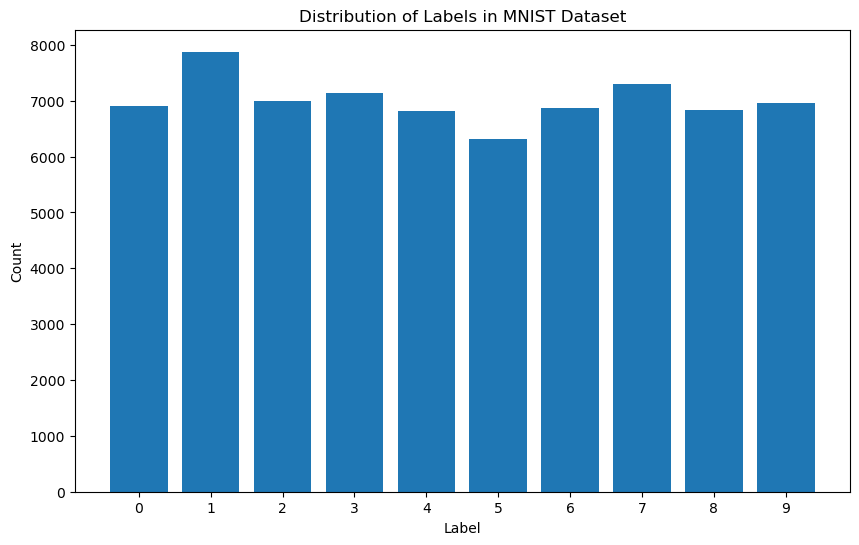

In [4]:
# 1. Eksplorasi Dataset
labels, counts = np.unique(mnist.target, return_counts=True)
print("Jumlah data setiap label:")
for label, count in zip(labels, counts):
    print(f"Label {label}: {count} data")

plt.figure(figsize=(10, 6))
plt.bar(labels, counts, tick_label=labels)

# Adding labels and title
plt.xlabel('Label')

plt.ylabel('Count')
plt.title('Distribution of Labels in MNIST Dataset')

# Show the plot
plt.show()

In [5]:
# Mengambil data dan label
X = mnist.data.astype('float32')
y = mnist.target.astype('int')

In [6]:
X.shape

(70000, 784)

In [7]:
scalling = MinMaxScaler()
X_scalling = scalling.fit_transform(X)

In [8]:
print(X_scalling[:5])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Ekstraksi Fitur dengan PCA


In [9]:
from sklearn.model_selection import GridSearchCV
n_components = 200
pca = RandomizedPCA(n_components =n_components, whiten=True, random_state=42)
X_pca = pca.fit_transform(X_scalling)

In [10]:
# Memisahkan data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

## Flattening

In [11]:
# Flattening data setelah PCA
X_flattened = X_pca.reshape(X_pca.shape[0], -1)

## Membuat Model ANN

In [12]:
import tensorflow as tf
from tensorflow import keras

In [13]:
import tensorflow as tf
from tensorflow import keras

# Membuat model ANN
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(n_components,)),  # Input layer dengan 150 fitur
    keras.layers.Dense(128, activation='relu'),  # Hidden layer dengan 128 neuron dan fungsi aktivasi ReLU
    keras.layers.Dense(64, activation='relu'),  # Hidden layer dengan 64 neuron dan fungsi aktivasi ReLU
    keras.layers.Dense(10, activation='softmax')  # Output layer dengan 10 neuron (sesuai dengan jumlah kelas) dan fungsi aktivasi softmax
])

# Menampilkan ringkasan model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 200)               0         
                                                                 
 dense (Dense)               (None, 128)               25728     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 34634 (135.29 KB)
Trainable params: 34634 (135.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Training Model

## Langkah 1 - Compile Model (Menyatukan Arsitektur) ANN

In [14]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

## Langkah 2 - Fitting Model

In [15]:
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2)

Epoch 1/20
700/700 [==============================] - 2s 2ms/step - loss: 0.5882 - accuracy: 0.8234 - val_loss: 0.2410 - val_accuracy: 0.9287
Epoch 2/20
700/700 [==============================] - 1s 1ms/step - loss: 0.1689 - accuracy: 0.9502 - val_loss: 0.1891 - val_accuracy: 0.9428
Epoch 3/20
700/700 [==============================] - 1s 2ms/step - loss: 0.1010 - accuracy: 0.9696 - val_loss: 0.1790 - val_accuracy: 0.9463
Epoch 4/20
700/700 [==============================] - 1s 2ms/step - loss: 0.0627 - accuracy: 0.9824 - val_loss: 0.1723 - val_accuracy: 0.9535
Epoch 5/20
700/700 [==============================] - 1s 2ms/step - loss: 0.0388 - accuracy: 0.9892 - val_loss: 0.1821 - val_accuracy: 0.9495
Epoch 6/20
700/700 [==============================] - 1s 2ms/step - loss: 0.0272 - accuracy: 0.9923 - val_loss: 0.1827 - val_accuracy: 0.9543
Epoch 7/20
700/700 [==============================] - 1s 1ms/step - loss: 0.0169 - accuracy: 0.9957 - val_loss: 0.1916 - val_accuracy: 0.9523
Epoch 

## Evaluasi

In [16]:
test_lost, test_acc = model.evaluate(X_test, y_test)
print(f"Akurasi pada data pelatihan: {test_acc: 2f}")

438/438 [==============================] - 1s 944us/step - loss: 0.3126 - accuracy: 0.9519
Akurasi pada data pelatihan:  0.951929


In [17]:
rain_lost, train_acc = model.evaluate(X_train, y_train)
print(f"Akurasi pada data pengujian: {train_acc: 2f}")


1750/1750 [==============================] - 2s 986us/step - loss: 0.0612 - accuracy: 0.9887
Akurasi pada data pengujian:  0.988714


In [18]:
predict = model.predict(X_test)
prediction_labels = np.argmax(predict, axis = 1)

confusion = confusion_matrix(y_test, prediction_labels)
print("Confusion Matrix")
print(confusion)

438/438 [==============================] - 0s 911us/step
Confusion Matrix
[[1298    1    4    0    0    9   13    4   11    3]
 [   0 1571    4    8    2    1    1    3    9    1]
 [   3   23 1300   11   11    3    4    4   19    2]
 [   3    7   14 1357    1   29    0    9    6    7]
 [   3    3    5    0 1238    3    6    5    5   27]
 [   2    5    2   26    1 1214    5    2    9    7]
 [   7    1    8    2   12   21 1337    0    8    0]
 [   3    8   17    9    9    4    1 1423    0   29]
 [  10    5   11   22    6   16    4    3 1264   16]
 [   5    4    1   21   29    6    1   17   11 1325]]
